# Analisis Sentimen Netizen pada Kebijakan TAPERA

## Import Library

In [2]:
!pip install Sastrawi
!pip install translate
!pip install googletrans==4.0.0-rc1
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip instal nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=7ad4d912ab7f0b0b9f6e5632693b119c171b70a03f491c0091e1d82392ab061f
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import tensorflow as tf
from nltk.tokenize import word_tokenize
import nltk
from textblob import TextBlob
import googletrans
from googletrans import Translator
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Ekstrak Dataset

In [ ]:
df_yt = pd.read_csv('/content/data_yt.csv',sep=',')
df_ig = pd.read_csv('/content/data_ig.csv',sep=',')

In [ ]:
df_yt.head()

,Unnamed: 0,author,date,like,comment,public
0,0,@ikih_ikih_kimochi,2024-07-29T02:26:45Z,0,Rumah dp 0 % itu saya aja mustahil sekali.. tp...,True
1,1,@dikicandrairawan5801,2024-07-27T11:18:54Z,0,ToLak maksa maksa rakyat indonesi negara bebas...,True
2,2,@dikicandrairawan5801,2024-07-27T11:16:04Z,0,Negara yg aman nyaman rakyat nya makmur negara...,True
3,3,@dikicandrairawan5801,2024-07-27T11:14:32Z,0,Kita bubarkan pemerintahan di rubah ganti unju...,True
4,4,@caiciu,2024-07-27T06:16:48Z,0,"Apa² yg diurus pemerintah kacau,berbelit dll.....",True


In [ ]:
comment_yt = df_yt['comment']

In [ ]:
df_ig.head()

,username,comment
0,kristinap_sirait03,BELAJAR DARI KASUS ASABRI GUYS🤣🤣🤣 MASYARAKAT I...
1,sata.sata.520357,Mana pendukung 02 pasti bangga bakal punya rum...
2,cep_emin,"Kalau gaji aggota DPR yg ""kerjanya demi rakyat..."
3,nienathalib_mua,Selamat buat pemilih 02 yg mau melanjutkan pro...
4,slmarief,Tapera- tabungan peras rakyat


In [ ]:
comment_ig = df_ig['comment']

In [ ]:
# Menggabungkan semua dataset
all_comments = pd.concat([comment_yt, comment_ig], ignore_index=True)

all_comments.columns = ['komen']

# Menampilkan beberapa baris dari dataset yang digabungkan
all_comments.head()

,comment
0,Rumah dp 0 % itu saya aja mustahil sekali.. tp...
1,ToLak maksa maksa rakyat indonesi negara bebas...
2,Negara yg aman nyaman rakyat nya makmur negara...
3,Kita bubarkan pemerintahan di rubah ganti unju...
4,"Apa² yg diurus pemerintah kacau,berbelit dll....."


In [ ]:
len(all_comments)

1965

## Data Cleaning

### Check Missing Value

In [ ]:
# Mengecek data kosong
all_comments.isna().sum()

0

### Remove Punctuation

In [ ]:
# Menghapus karakter selain huruf
def remove_punctuation(text):
  text = re.sub(r'@[A-Za-z0-9_]+','',text)
  text = re.sub(r'@\w+','',text)
  text = re.sub(r'RT[\s]+','',text)
  text = re.sub(r'https?://\S','',text)
  text = re.sub(r'[^A-Za-z0-9 ]','',text)
  text = re.sub(r'\s+',' ',text)

  return text

all_comments = all_comments.apply(remove_punctuation)
all_comments = all_comments.str.lower()

### Memperbaiki Kata Singkatan

In [ ]:
# Edit kata singkatan
kata = {"yg":"yang", "nethink":"negatif thinking", "gak":"tidak", "jgn":"jangan", "udh":"udah", "mreka":"mereka", "msh":"masih",}

def normalisasi(text):
  for i in kata:
    text = text.replace(i, kata[i])
  return text

all_comments = all_comments.apply(lambda x: normalisasi(x))

### Removing Stopwords

In [ ]:
# Menghapus Stopwords
stop_words = StopWordRemoverFactory().get_stop_words()

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(text):
  text = stop_words_remover_new.remove(text)

  return text

all_comments = all_comments.apply(lambda x: stopword(x))

all_comments.head()

,comment
0,rumah dp 0 saya aja mustahil sekali tp gaungka...
1,tolak maksa maksa rakyat indonesi negara bebas...
2,negara aman nyaman rakyat nya makmur negara be...
3,bubarkan pemerintahan rubah ganti unjuk rasa r...
4,apa diurus pemerintah kacauberbelit dllpotensi...


## Tokenisasi

In [ ]:
# Tokenisasi kolom "komen"
komen_tokenize = all_comments.apply(word_tokenize)

komen_tokenize

,comment
0,"[rumah, dp, 0, saya, aja, mustahil, sekali, tp..."
1,"[tolak, maksa, maksa, rakyat, indonesi, negara..."
2,"[negara, aman, nyaman, rakyat, nya, makmur, ne..."
3,"[bubarkan, pemerintahan, rubah, ganti, unjuk, ..."
4,"[apa, diurus, pemerintah, kacauberbelit, dllpo..."
...,...
1960,"[akal, akalan, mencari, uang, ikn]"
1961,"[wahai, pejabat, pemerintah, inget, dunia, han..."
1962,"[pak, dri, gaji, dihasilkan, cukup, gk, cukup,..."
1963,"[kalau, mah, dana, mending, pindah, negara]"


### Stemming

In [ ]:
# Menghapus imbuhan kata
def stemming(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []

  for i in text:
    dt = stemmer.stem(i)
    do.append(dt)
  cleaned_text = []
  cleaned_text = " ".join(do)

  print(cleaned_text)

  return cleaned_text

komen_tokenize = komen_tokenize.apply(stemming)
komen_tokenize.to_csv("/content/komen_stemming.csv")

rumah dp 0 saya aja mustahil sekali tp gaung program menang jd pimpin suatu daerah arti rakyat gampang bodoh
tolak maksa maksa rakyat indonesi negara bebas suka suka dong mau tabung tapera
negara aman nyaman rakyat nya makmur negara bebas negara demokrasi indonesia
bubar perintah rubah ganti unjuk rasa rusuh ricuh besar besar jakarta lengser perintah negara harus memulyakan makmur rakyat nya negara bebas negara demokrasi negara republik indonesia
apa urus perintah kacauberbelit dllpotensi korupsi
malaysia orang nganggur dapat uang dr perintah konoha nganggur injek kerja peras darah gimik pajak tabung
ayo lah bang raymond abang lihat mulai peduli negara emg bang raymodn orang etnis china abang lahir indonesia bang raymond punya pikir kritiscerdasdan pandai jadi manfaat lebih abang baik orang baik milih baik jujur amanah orang baik panen hasil baikpercaya semua hasil balas di ikan tuhan klo abang konsisten jadi baik sempurna lebih abang
untung udah gk jd karyawan
habis tapera terbit asur

In [32]:
df = pd.read_csv('/content/komen_stemming.csv')
df

,Unnamed: 0,comment
0,0,rumah dp 0 saya aja mustahil sekali tp gaung p...
1,1,tolak maksa maksa rakyat indonesi negara bebas...
2,2,negara aman nyaman rakyat nya makmur negara be...
3,3,bubar perintah rubah ganti unjuk rasa rusuh ri...
4,4,apa urus perintah kacauberbelit dllpotensi kor...
...,...,...
1960,1960,akal akal cari uang ikn
1961,1961,wahai jabat perintah inget dunia hanya jadi pi...
1962,1962,pak dri gaji hasil cukup gk cukup pak mulai se...
1963,1963,kalau mah dana mending pindah negara


## Labelling Data



Menggunakan Pre-Trained Indonesian Roberta untuk Labelling Text Bahasa **Indonesia**

In [38]:
from transformers import pipeline

# Inisialisasi pipeline
pretrained_name = "w11wo/indonesian-roberta-base-indolem-sentiment-classifier-fold-0"
nlp = pipeline(
    "sentiment-analysis",
    model=pretrained_name,
    tokenizer=pretrained_name
)

# Fungsi untuk analisis sentimen
def sentiment_analysis(text):
    if not isinstance(text, str):  # Memeriksa apakah input adalah string
        return 'neutral'  # Mengembalikan label default jika bukan string

    max_length = 512  # Panjang maksimum token
    # Menggunakan tokenizer secara langsung untuk potong teks
    encoded_input = nlp.tokenizer(text, truncation=True, max_length=max_length, return_tensors='pt')
    # Melakukan analisis sentimen
    result = nlp(text)
    return result[0]['label']

# Menerapkan fungsi sentiment_analysis ke kolom 'comment'
df['sentimen'] = df['comment'].apply(sentiment_analysis)

Mengubah hasil labelling oleh Indonesia Roberta dengan Sentiment Positif Negatif

In [44]:
# Mengubah label 'sentimen' menjadi 'negatif', 'positif', atau 'neutral'
def map_sentiment(label):
    if label == 'LABEL_0':
        return 'negatif'
    elif label == 'LABEL_1':
        return 'positif'
    else:
        return 'neutral'

df['sentimen'] = df['sentimen'].map(map_sentiment)

In [45]:
df

,Unnamed: 0,comment,sentimen
0,0,rumah dp 0 saya aja mustahil sekali tp gaung p...,negatif
1,1,tolak maksa maksa rakyat indonesi negara bebas...,negatif
2,2,negara aman nyaman rakyat nya makmur negara be...,positif
3,3,bubar perintah rubah ganti unjuk rasa rusuh ri...,negatif
4,4,apa urus perintah kacauberbelit dllpotensi kor...,negatif
...,...,...,...
1960,1960,akal akal cari uang ikn,negatif
1961,1961,wahai jabat perintah inget dunia hanya jadi pi...,positif
1962,1962,pak dri gaji hasil cukup gk cukup pak mulai se...,negatif
1963,1963,kalau mah dana mending pindah negara,negatif


## Visualisasi

Text(0.5, 1.0, 'Persentase Sentiment Netizen tentang Tapera')

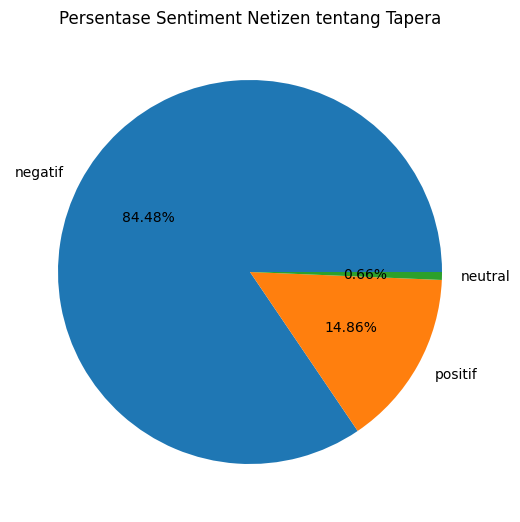

In [46]:
diagram = df['sentimen'].value_counts().rename_axis('nilai_sentimen').reset_index(name='jumlah')
label = diagram.nilai_sentimen
nilai = diagram.jumlah

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis = ('equal')


ax.pie(nilai, labels = label, autopct='%1.2f%%' )
ax.set_title("Persentase Sentiment Netizen tentang Tapera")

Dari hasil analisis sentimen di atas, dapat dilihat bahwa masyarakat pengguna Instagram dan YouTube mempunyai pandangan/reaksi yang buruk terhadap kebijakan Tapera tersebut

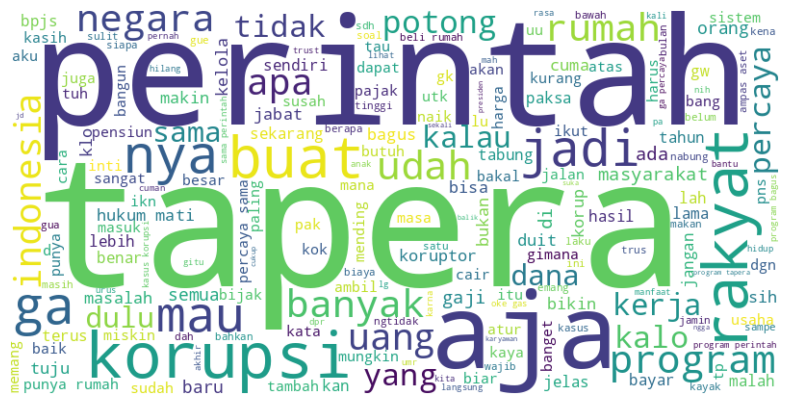

In [47]:
from wordcloud import WordCloud

teks_negatif = df[df['sentimen'] == 'negatif']['comment'].str.cat(sep=' ')

# Membuat objek WordCloud
wordcloud_negatif = WordCloud(width=800, height=400, background_color='white').generate(teks_negatif)

# Menampilkan word cloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.axis('off')
plt.show()

In [48]:
df.to_csv("/content/hasil_analisis.csv")